In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%cd '../'

/home/laurent/quantic/science/HomeHots/HOTS_clone_laurent


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import time

from HOTS.ToolsMonitor import GenerateActivationMap, DisplayActivationMap
from HOTS.Event import Event, SimpleAlphabet, LoadNMNIST
from HOTS.STS import STS
from HOTS.Layer import ClusteringLayer
from HOTS.ToolsMonitor import (
    DisplayImage,
    DisplaySurface3D,
    DisplaySurface2D,
    DisplayConvergence,
)
from HOTS.Tools import SaveObject, LoadObject
from HOTS.Classifier import Classifier
from HOTS.Network import Network
from HOTS.KmeansLagorce import KmeansLagorce
from HOTS.KmeansMaro import KmeansMaro
from HOTS.Event import conv2eve

tau = 9e-4 # -> tau=1ms, si on prend 10 ms on est à 1s pour la dernière couche et les vidéos font 0.3s en moyenne
R = 2
filthr = 2
nbkNN = 3
algo = 'lagorce'
decay = 'exponential'
hom = True
krnlinit = 'rdn'
nb_cluster = [4, 8, 16]
ImageSize = (34, 34)
DataPath = 'Data/testsetnmnist.p'

NbClusteringData = 15
NbTrainingData = 40
NbTestingData = 40
_1ofich = True
event_tr, event_te, event_cl, label_tr, label_te = LoadNMNIST(
NbTrainingData, NbTestingData, NbClusteringData, OneOfEach=_1ofich, Path=DataPath, OutOnePolarity=False, ListPolarities=None, verbose=0)

[0, 1, 7, 9, 3, 2, 8, 5, 4, 6]


In [3]:
event_tr.address.shape, label_tr

((165679, 2),
 array([[0.],
        [1.],
        [7.],
        [9.],
        [3.],
        [2.],
        [8.],
        [5.],
        [4.],
        [6.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

In [4]:
label_tr.shape

(40, 1)

In [5]:
event_tr.polarity, event_te.ListPolarities, event_cl.ListPolarities

(array([0, 1, 1, ..., 0, 0, 0]), array([0, 1]), array([0, 1]))

In [6]:
import pickle
Path = 'Data/testsetnmnist.p'
EVE = pickle.load(open(Path, "rb" ))

In [7]:
len(EVE)

10000

In [8]:
for i in range(1500, 1501):
    one_list_of_events_for_one_digit = EVE[i]
    print(one_list_of_events_for_one_digit.l)

1


In [9]:
#timestr = time.strftime("%Y%m%d")
hom = False
timestr = '20201021'
if hom==True:
    fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+algo+'_homeo.pkl'
else:
    fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+algo+'.pkl'
print(fname)

L1 = ClusteringLayer(tau=tau,R=R,verbose=0,ThrFilter=filthr,LearningAlgo=algo,kernel=decay,homeo=hom,init=krnlinit)
L2 = ClusteringLayer(tau=10 * tau,R=2 * R,verbose=0,ThrFilter=filthr,LearningAlgo=algo,kernel=decay,homeo=hom,init=krnlinit)
L3 = ClusteringLayer(tau=10 * 10 * tau,R=2 * 2 * R,verbose=0,ThrFilter=filthr,LearningAlgo=algo,kernel=decay,homeo=hom,init=krnlinit)
Net = Network([L1, L2, L3])

Records/EXP_03_NMNIST/20201021_hots_0.9ms_lagorce.pkl


In [10]:
if not os.path.isfile(fname):
    ClusterLayer, event_output = Net.TrainCluster(
            event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=1
        )
    SaveObject(ClusterLayer, fname)
else: 
    ClusterLayer, Classif0 = LoadObject(fname)

prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)

battacha:52.5% ### normalized:42.5% ### euclidian:45.0% ### 


In [11]:
homrun = False
event0_o_tr2 = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer, homrun=homrun)
event0_o_te2 = Net.RunNetwork(event_te, NbClusterList=ClusterLayer, homrun=homrun)


In [12]:
Classif02 = Classifier(event0_o_tr2, event0_o_te2, TrainingLabel=label_tr, GroundTruth=label_te)
prediction2, accuracy2, method2 = Classif02.HistogramDistance(knn=nbkNN, to_print=True)

Classif02

Classif02.event_train.time

battacha:42.5% ### normalized:42.5% ### euclidian:47.5% ### 


array([0.017383, 0.01786 , 0.018139, ..., 0.302028, 0.303374, 0.305669])

### Loading only on digit of each for logistic regression

In [13]:
ImageSize

(34, 34)

In [14]:
len(event_te.ChangeIdx)

40

In [15]:
event0_o_te2.ChangeIdx.shape, event0_o_te2.ChangeIdx

((40,),
 array([  4176,  10580,  14967,  19028,  22487,  27776,  31605,  34991,
         39677,  43915,  48852,  52677,  55433,  59249,  62823,  69244,
         72420,  76434,  80024,  82288,  87344,  91863,  96823, 102197,
        107631, 111138, 114561, 118166, 122930, 126209, 128918, 133766,
        137751, 142590, 147584, 152816, 157656, 162824, 167629, 168819]))

In [16]:
label_tr.shape#, label_tr

(40, 1)

In [17]:
event0_o_te2.address.shape, event0_o_te2.polarity.shape, event0_o_te2.time.shape

((168820, 2), (168820,), (168820,))

In [18]:
event0_o_te2.ChangeIdx

array([  4176,  10580,  14967,  19028,  22487,  27776,  31605,  34991,
        39677,  43915,  48852,  52677,  55433,  59249,  62823,  69244,
        72420,  76434,  80024,  82288,  87344,  91863,  96823, 102197,
       107631, 111138, 114561, 118166, 122930, 126209, 128918, 133766,
       137751, 142590, 147584, 152816, 157656, 162824, 167629, 168819])

In [19]:
event0_o_te2.ListPolarities

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [20]:
event0_o_te2

In [21]:
event0_o_te2.ChangeIdx

array([  4176,  10580,  14967,  19028,  22487,  27776,  31605,  34991,
        39677,  43915,  48852,  52677,  55433,  59249,  62823,  69244,
        72420,  76434,  80024,  82288,  87344,  91863,  96823, 102197,
       107631, 111138, 114561, 118166, 122930, 126209, 128918, 133766,
       137751, 142590, 147584, 152816, 157656, 162824, 167629, 168819])

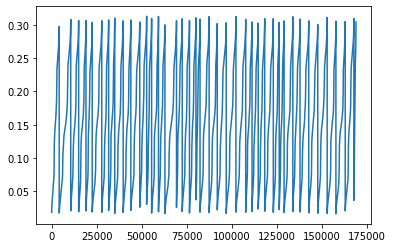

In [22]:
plt.plot(event0_o_te2.time)

In [23]:
for idx in event0_o_te2.ChangeIdx:
    print(event0_o_te2.time[idx])

0.297421
0.308011
0.306317
0.306262
0.30363399999999996
0.305942
0.307236
0.309977
0.305852
0.30721499999999996
0.30400099999999997
0.31277099999999997
0.309482
0.31243299999999996
0.299794
0.306186
0.308857
0.30630799999999997
0.310449
0.308589
0.312287
0.301809
0.302853
0.312266
0.30807
0.304119
0.30236199999999996
0.30910299999999996
0.309027
0.30347799999999997
0.305818
0.311938
0.30847199999999997
0.30579
0.30031399999999997
0.310911
0.305347
0.30479999999999996
0.30929999999999996
0.3041


### Building matrix for logistic regression

In [24]:
np.save?

Number of events: 44635 - Number of features: 18496


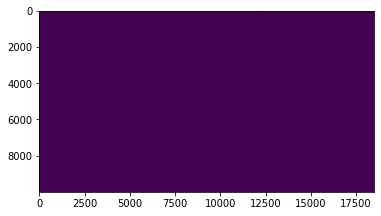

In [25]:
#fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_vectorzLR.pkl'
fname = '/tmp/'+timestr+'_hots_vectorzLR'
if not os.path.isfile(fname + '_X.npy'):
    data_len = ImageSize[0]*ImageSize[1]*len(event0_o_tr2.ListPolarities)
    n_events = event0_o_tr2.time.shape[0]
    tau_cla = 1e-2

    X = np.zeros((n_events, data_len))
    y = np.zeros((n_events,))
    data = np.zeros((ImageSize[0], ImageSize[1], len(event0_o_tr2.ListPolarities))) #tmp data

    t_old = 0
    i_label_tr = 0
    for i in range(1, n_events):
        if i == event0_o_te2.ChangeIdx[i_label_tr]:
            i_label_tr += 1

        t_new = event0_o_tr2.time[i]
        data *= np.exp(-(t_new-t_old)/tau_cla)
        data[event0_o_tr2.address[i, 0], event0_o_tr2.address[i,1], event0_o_tr2.polarity[i]] = 1.

        X[i, :] = data.ravel()
        y[i] = label_tr[i_label_tr]

    plt.imshow(X[:10000]);
    print('Number of events: '+str(X.shape[0])+' - Number of features: '+str(X.shape[1]))
    #SaveObject([X,y], fname)
    np.save(fname + '_X.npy', X)
    np.save(fname + '_y.npy', y)
    
else: 
    #X,y = LoadObject(fname)
    X = np.load(fname + '_X.npy')
    y = np.load(fname + '_y.npy')
    

In [26]:
X.shape

(44635, 18496)

### Performing logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR(random_state=0).fit(X, y)

ModuleNotFoundError: No module named 'sklearn'

In [28]:
lr.score(X, y)

NameError: name 'lr' is not defined

In [29]:
P_pred = lr.predict_proba(X)
P_pred.shape

NameError: name 'lr' is not defined

In [30]:
plt.plot(np.max(P_pred, axis=1))

NameError: name 'P_pred' is not defined